<a href="https://colab.research.google.com/github/lfmartins/introduction-to-computational-mathematics/blob/main/13_numericaldifferentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

In a a previous lesson, we used an approximation of the derivative that came from Calc 1 and the start of discussions about the limit definition of a derivative,

$$ f'(x)=\lim_{h\to0} \frac{f(x+h)-f(x)}{h}.$$

But why does this work? In Calc 1, we often play around with algebra for a few functions to show that this can reduce to a single algebraic expression after taking a limit of h. 

However, we can also use Taylor series to examine why this works and what error looks like when using it as a approximation,

$$ f'(x)≈\frac{f(x+h)-f(x)}{h}.$$

This is often called a **forward difference** approximation .Let's begin by first taking an a Taylor series of $f(x+h)$ centered at $x$.

$$f(x+h)=f(x)+\frac{f'(x)}{1!}(x+h-x)+\frac{f''(x)}{2!}(x+h-x)^2+\frac{f^{(3)}(x)}{3!}(x+h-x)^3+\frac{f^{(4)}(x)}{4!}(x+h-x)^4...$$
$$=f(x)+\frac{f'(x)}{1}h+\frac{f''(x)}{2}h^2+\frac{f^{(3)}(x)}{6}h^3+\frac{f^{(4)}(x)}{24}h^4...$$

Here we've show the first five terms of the Taylor series. Note that all of the terms after the first term depend on $h$, which is distance between $x$ and $x+h$.

Now replacing $f(x+h)$ with our Taylor series,

$$\frac{f(x+h)-f(x)}{h}=\frac{(f(x)+\frac{f'(x)}{1}h+\frac{f''(x)}{2}h^2+\frac{f^{(3)}(x)}{6}h^3+...)-f(x)}{h}$$
$$=\frac{f'(x)h+\frac{1}{2}f''(x)h^{2}+\frac{1}{6}f^{(3)}(x)h^3+...}{h}$$
$$=f'(x)+\frac{1}{2}f''(x)h+\frac{1}{6}f^{(3)}(x)h^2+...$$

Let's note a few things. 

First, if $h\to0$ then the only term left is the first derivative $f'(x)$, which is the goal of the approximation. In practice this is only true up to a certain point due to finite digit precision.

Another thing to note is that if $0<h<1$, then $h>h^{2}>h^{3}>h^{4}>....$ This means that additional terms of the Taylor series will be smaller than lower order terms. The largest contribution of error would be probably from $\frac{1}{2}f''(x)h$. We can use the Taylor Remainder Theorem to say there exists an $\xi$ between $x$ and $x+h$ such that

$$\frac{1}{2}f''(\xi)h=\frac{1}{2}f''(x)h+\frac{1}{6}f^{(3)}(x)h^2+...$$

We can treat $\frac{1}{2}f''(\xi)$ as a constant C so that the largest contribution to approximation error is $Ch$ which is often written using big-'Oh' notation as $O(h)$.

In summary, we can say the forward difference approximation approximates the first derivative with an additional error term

$$ \frac{f(x+h)-f(x)}{h}= f'(x)+O(h)$$



The forward difference approximation is a **first order method** since the lowest order error term is of order 1, i.e. $O(h)=O(h^1)$. If the approximation's *lowest order error* term that is a constant multiplied by the stepsize squared, i.e. $O(h^{2})$, then we say the approximation is **second order**.

## Exercises

1. Prove that the backward difference approximation,
$$f(x)-f(x-h)\over h$$
is a first order approximation to $f'(x)$. This should be similar to the example from the forward difference operator. 

2. Prove that the centered difference approximation,
$$f(x+h)-f(x-h)\over 2h$$
is a second order approximation to $f'(x)$.


3. Prove that the second-order centered difference approximation
$$f(x+h)-2f(x)+f(x-h)\over h^2$$
is a second order approximation to $f''(x)$. Not that this is an approximation to the second derivative.


# Finite Precision Issues

Let's see how well this story about error works in practice with finite digit precision. Let's calculate the error associated with the forward difference approximation for $e^{x}$ at $x=0$ as we range $h$ from $10^{0}$ to $10^{-16}$. 

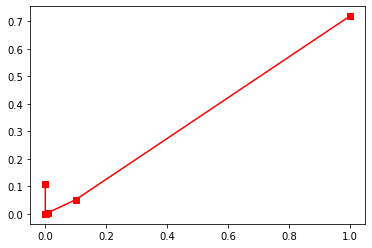

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def forwarddiff(f,x,h):
  df=(f(x+h)-f(x))/h
  return df


df_true=1.0
x=0.0
error=np.zeros(16)
h=np.zeros(16)
for k in range(0,16):
  h[k]=10**(-k)
  df_approx=forwarddiff(np.exp,x,h[k])
  error[k]=np.abs(df_true-df_approx)

plt.plot(h,error,'sr-')



We note that the plot appears to be decreasing, but because the stepsizes and error get increasingly smaller it becomes harder to visualize using a standard plot. Instead we can change the scale of the plots to be on a logarithmic scale using `loglog()`.

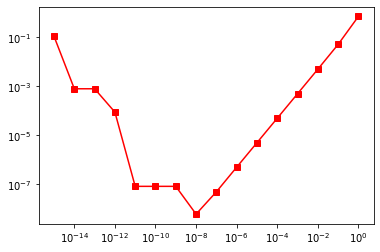

In [11]:
plt.loglog(h,error,'sr-')


We see this V shape instead of a straight slope. While the larger stepsizes display we introduce round-off error with our substraction, such that error is really

$$e=Ch+\frac{\epsilon}{h}$$

where $\epsilon=10^{-16}$. As $h$ initially decreases, the first term declines, cause the total error to go down. As $h$ gets below a certain point the second term begins to grow. 

## Exercises

1. Perform the same error experiment for 

$$f(x+h)-f(x-h)\over 2h.$$

2. Perform the same error experiment for 

$$f(x+h)-2f(x)+f(x-h)\over h^2$$

3. One can find the optimal $h$ to minimize error by finding the minimimum of $e=e(h)$. Let $c=1$ and find which $h$ minimizes error.